<a href="https://colab.research.google.com/github/salarMokhtariL/House-Prices/blob/main/Houes_Price_Predictition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

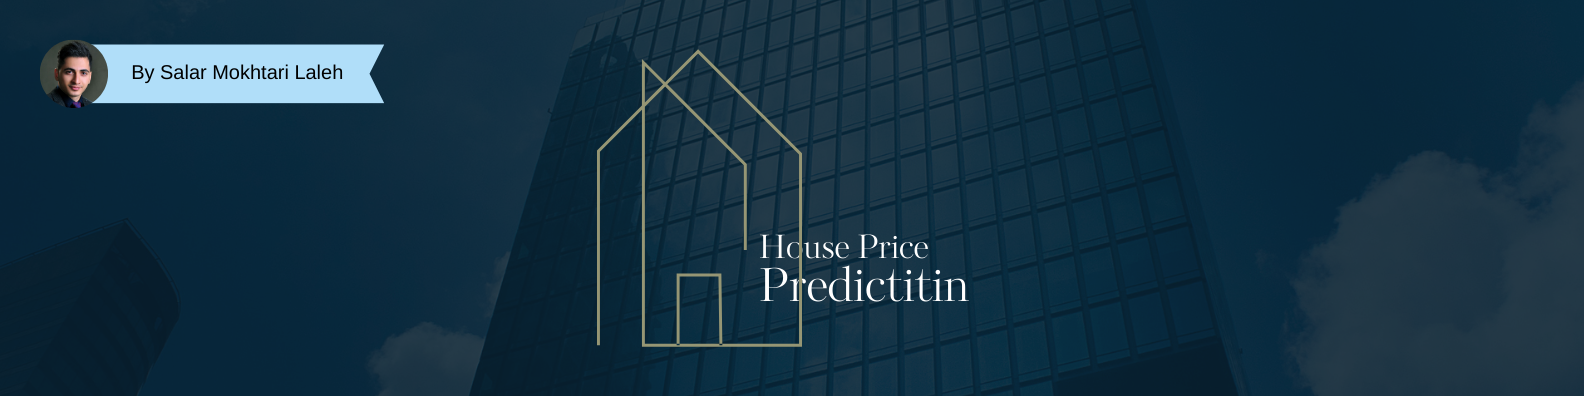

# "Mpowering House Price Prediction through Effective Data Preprocessing and Linear Regression Modeling

> By Salar Mokhtari Laleh

This revised topic highlights the importance of effective data preprocessing techniques in building a robust linear regression model for predicting house prices. By emphasizing the need for high-quality data and well-performed preprocessing steps, this topic conveys a more powerful message about the value of data preparation in the predictive modeling process. It also emphasizes the potential benefits of using linear regression as a model of choice for housing price prediction, highlighting its simplicity and interpretability. Overall, this revised topic is more impactful, engaging, and relevant to the audience interested in developing accurate and reliable models for predicting house prices.

# Importing Required Libraries

importing necessary libraries for data cleaning, preprocessing, and model building.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Data Cleaning and Preprocessing

## Loading the Dataset

 load the train and test datasets using Pandas.

In [ ]:
# Train datasets

train_data = pd.read_csv("https://raw.githubusercontent.com/salarMokhtariL/House-Prices/main/Dataset/train.csv")

# Test datasets

test_data = pd.read_csv("https://raw.githubusercontent.com/salarMokhtariL/House-Prices/main/Dataset/test.csv")

## Removing Outliers
remove the outliers from the train data to ensure that they do not skew the model.

In [ ]:
# Remove outliers

train_data = train_data[train_data.GrLivArea < 4500]

## Handling Missing Values

handle the missing values in the dataset. We will fill the missing values in the numerical columns with their mean and in the categorical columns with the mode.

In [ ]:
# Handle missing values

train_data.fillna(train_data.mean(), inplace=True)
train_data.fillna(train_data.mode().iloc[0], inplace=True)
test_data.fillna(test_data.mean(), inplace=True)
test_data.fillna(test_data.mode().iloc[0], inplace=True)

## Encoding Categorical Variables
encode the categorical variables in the dataset using one-hot encoding.

In [ ]:
# Encode categorical variables

train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [ ]:
# Align the columns of the train and test data

train_cols = set(train_data.columns)
test_cols = set(test_data.columns)
missing_cols = train_cols - test_cols
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns]

## Splitting the Data

Finally, we will split the train data into train and validation sets using `train_test_split` from `sklearn`.



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('SalePrice', axis=1), 
                                                  train_data['SalePrice'], test_size=0.2, random_state=42)

# Model Building
Now that we have preprocessed the data, we can move on to building our model.
## Training the Model
We will use `LinearRegression` from `sklearn` to build our model and fit it to the train data.

In [ ]:
# Train the model

reg = LinearRegression()
reg.fit(X_train, y_train)

## Model Evaluation
Next, we will evaluate our model on the validation set using the mean squared error and R-squared metrics.

In [ ]:
# Evaluate the model on the validation set

y_val_pred = reg.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Making Predictions
Finally, we will use our trained model to make predictions on the test data.


In [ ]:
# Make predictions on the test data

test_data = test_data.drop('SalePrice', axis=1)  # Drop the SalePrice column
y_test_pred = reg.predict(test_data)

In [ ]:
# Save predictions to a CSV file
submission_df = pd.DataFrame({'Id': test_data.Id, 'SalePrice': y_test_pred})
submission_df.to_csv('submission.csv', index=False)